<div class="alert alert-block alert-info" style="background-color: #A0C020; color: white;">
<center> <h1> Business Case 1 - Hotel Customer Segmentation </h1> </center> <br>
<center> <h2> Group P </h2> </center> <br>
    <center> <h3> 2024/2025 </h3> </center>

# BUSINESS CASE 1: HOTEL CUSTOMER SEGMENTATION

### This notebook uses the *Case1_HotelCustomerSegmentation.csv* dataset

<h3 style="text-align: center;"><u></b>Group P</u></b></h3>

|     Student Name     |     Student ID     | 
|         ---          |           ---          |
|     Beatriz Monteiro|   20240591        | 
|     Catarina Nunes           |       20230083       |
|     Margarida Raposo      |       20241020       |
|     Teresa Menezes   |      20240333       |

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h2 style="color: white; margin: 0;">Project Metadata</h2>
</di>

### Project Title
**Hotel Customer Segmentation**

### Project Description
This case study focuses on customer segmentation for Hotel H, a member of an independent hotel chain located in Lisbon, Portugal. The hotel's current market segmentation strategy, based solely on the origin of customers, is deemed inadequate by the new marketing manager, A. The primary objective is to develop a more comprehensive segmentation approach that incorporates geographic, demographic, and behavioral characteristics to better understand and target different customer groups. The findings aim to inform strategic decisions on product offerings, pricing, and marketing efforts to enhance customer engagement and acquisition.

### Features
- **ID**: Customer ID
- **Nationality**: Nationality of the customer in ISO 3166-1 (Alpha 3) format
- **Age**: The age of the customer
- **DaysSinceCreation**: Number of elapsed days since the customer was created
- **NameHash**: Hash of the customer's name
- **DocIDHash**: Hash of the customer’s personal document identification number (usually a passport or ID card)
- **AverageLeadTime**: Average number of days before arrival date the customer makes bookings
- **LodgingRevenue**: Total amount of lodging revenue paid by the customer so far
- **OtherRevenue**: Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far
- **BookingsCanceled**: Number of bookings the customer made but subsequently canceled
- **BookingsNoShowed**: Number of bookings the customer made but subsequently made a "no-show"
- **BookingsCheckedin**: Number of bookings the customer made, which actually ended up staying
- **PersonNights**: Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children in 
each booking, multiplied by the number of Nights (Length-of-stay) of the booking
- **RoomNights**: Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of 
rooms of each booking by the the number of Nights (Length-ofstay) of the booking
- **DistributionChannel**: Distribution channel normally used by the customer to make bookings at the hotel
- **MarketSegment**: Current market segment of the customer
- **SRHighFloor**: Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes)
- **SRLowFloor**: Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes)
- **SRAccessibleRoom**: Indication if the customer usually asks for an accessible room (0: No, 1: Yes)
- **SRMediumFloor**: Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes)
- **SRBathtub Indication**: if the customer usually asks for a room with a bathtub (0: No, 1: Yes)
- **SRShower**: Indication if the customer usually asks for a room with a shower (0: No, 1: Yes)
- **SRCrib**: Indication if the customer usually asks for a crib (0: No, 1: Yes)
- **SRKingSizeBed**: Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes)
- **SRTwinBed Indication**: if the customer usually asks for a room with a twin bed (0: No, 1: Yes)
- **SRNearElevator**: Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes)
- **SRAwayFromElevator**: Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes)
- **SRNoAlcoholInMiniBar**: Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes)
- **SRQuietRoom**: Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes)


### CRISP-DM
1. **Business Understanding**: Defining objectives, assessing resources, and project planning.
2. **Data Understanding**: Collecting, exploring, and verifying data quality.
2. **Data Preparation**: Selecting, cleaning, constructing, integrating, and formatting data to ensure it is ready for analysis.
3. **Modeling**: 
4. **Evaluation**:
5. **Deployment**:


<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h2 style="color: white; margin: 0;">Import Libraries</h2>
</div>

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import math
from math import ceil
from scipy.stats import chi2_contingency

In [3]:
pd.set_option('display.max_columns', None) # to display the max number of columns

<a id = "Index"></a>

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h1 style="color: white; margin: 0;">Index</h1>
</div>

1. [Data Understanding](#Data-Understanding)
    * 1.1. [Data Loading and Description](#Data-Loading-and-Description)

    * 1.2. [Exploratory Data Analysis](#EDA)

        - [1.2.1. Data Types](#Data-Types)

        - [1.2.2. Univariate EDA: Descriptive Summary](#Descriptive-Summary)
            * Numeric Features
            * Non Numeric Features 

        - [1.2.3. Missing Values](#missingvalues)

        - [1.2.4. Univariate EDA: Data Visualization](#Univariate-Vizualization)
            * Numeric variables: Histograms
            * Numeric variables: Boxplots
            * Categorical variables: BarPlots
            * Categorical variables: Geographic Map
            * Boolean variables: Barplots
 
        - [1.2.5. Bivariate EDA: Data Visualization](#Bivariate-Vizualization) 
            * Numeric-Numeric: Correlations
            * Numeric-Categorical: Correlations
            * Categorical-Categorical: Cross-tabulations
            * Boolean-Boolean: Cross-tabulations
 
        - [1.2.6. Multivariate EDA: Duplicates](#Multivariate) 

2. [Data Preparation](#Data-Preparation)

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h1 style="color: white; margin: 0;">1. Data Understanding</h1>
</div>

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h2 style="color: white; margin: 0;">1.1. Data Loading and Description</h2>
</div>

Let's start off by importing our dataset usind read_csv from pandas.

In [6]:
# Opening our dataset
df = pd.read_csv('Case1_HotelCustomerSegmentation.csv', sep=';')
df

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,0,2,6,4,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111728,111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0
111729,111730,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,0,1,10,5,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
111730,111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
111731,111732,DEU,48.0,36,0xC70AE03F615CB96B0C84CF29419C2DDFE8EC64B77104...,0xF589C016E6988AECD3E3BE793E7D606BBDB6B6D4795C...,66,708.00,185.0,0,0,1,8,4,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0


Now, we want to set the column `ID` as the index in the dataframe, as this column is supposed to identify an individual reservation. However, first, to ensure we don't lose any important rows due to identifier mistakes, we will check if this column only contains unique values:

In [7]:
unique_reservations = df['ID'].nunique()
total_rows = len(df)

print(f"The ID column has {unique_reservations}"
      f" unique values,\nand the dataframe df has {total_rows} rows.")
if unique_reservations == total_rows:
    print("All ID values are unique.")
else:
    print("There are duplicate ID values.")

The ID column has 111733 unique values,
and the dataframe df has 111733 rows.
All ID values are unique.


In [8]:
# Set ID as the index
df.set_index('ID', inplace=True)

In [9]:
df.head(5)

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,0,2,6,4,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# We create a copy to not cause any issues on main dataframe.
df_copy = df.copy()

<a id = "EDA"></a>

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h2 style="color: white; margin: 0;">1.2. Exploratory Data Analysis</h2>
</div>

<a class="anchor" id="Data-Types">

### 1.2.1. Data Types

</a>

In [11]:
df.dtypes

Nationality              object
Age                     float64
DaysSinceCreation         int64
NameHash                 object
DocIDHash                object
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  SRHig

`Note`: Its important to optimize the columns datatyes, specially in large models to optimize the model performance. Right now we have a memory usage of 24.7+ MB, but we can clearly see that some columns can be optimized. 

- Lets see the values of each column to see the optimal type for the Categorical Variables Columns and Numerical Variables: 

<a class="anchor" id="Descriptive-Summary">

### 1.2.2. Univariate EDA: Descriptive Summary

</a>

#### Numeric Features

In [13]:
# Summary statistics for numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,107561.0,45.639191,17.244952,-10.0,33.0,47.0,58.0,123.00
DaysSinceCreation,111733.0,595.026599,374.657382,36.0,288.0,522.0,889.0,1385.00
AverageLeadTime,111733.0,60.833147,85.115320,-1.0,0.0,21.0,95.0,588.00
LodgingRevenue,111733.0,283.851283,379.131556,0.0,0.0,208.0,393.3,21781.00
OtherRevenue,111733.0,64.682802,123.580715,0.0,0.0,31.0,84.0,8859.25
BookingsCanceled,111733.0,0.002282,0.080631,0.0,0.0,0.0,0.0,15.00
BookingsNoShowed,111733.0,0.000600,0.028217,0.0,0.0,0.0,0.0,3.00
BookingsCheckedIn,111733.0,0.737607,0.730889,0.0,0.0,1.0,1.0,76.00
PersonsNights,111733.0,4.328318,4.630739,0.0,0.0,4.0,6.0,116.00
RoomNights,111733.0,2.203825,2.301637,0.0,0.0,2.0,3.0,185.00


**Numeric variables**: `Age`; `DaysSinceCreation`; `AverageLeadTime`; `LodgingRevenue`; `OtherRevenue`; `BookingsCanceled`; `BookingsNoShowed`; `BookingsCheckedIn`; `PersonsNights`; `RoomNights`.

- The only numeric columns that should be in float format are `LodgingRevenue` and `OtherRevenue`. Large range (0 to 21,781) and (0 to 8859.25), so **float32** is optimal for memory without losing precision. This two columns contain **outliers**, with their maximum values being significantly higher than the mean and even the 75th percentile. This indicates that a small number of clients, possibly corporate clients or large groups, spent much more at the hotel compared to the majority. Such outliers can distort summary statistics, including averages and quartiles, potentially leading to a misleading representation of the typical revenue patterns.

- The variable `age` contains incorrect negative values and a maximum of 123 which is not possible. The type should be **uint8** because no one is older than 255 years and there are no negative ages.

- `DaysSinceCreation` ranges from 36 to 1385, fits within uint16 (0 to 65,535).

- `AverageLeadTime` has a negative value of -1 that needs to be adressed because doesn't make sense to have negative values in a variable that represents the *average number of days before arrival date 
the customer makes bookings*. So the type should be **int16** if we want to consider the negative value or **uint16** (0 to 65,535) if not.

- For variables `BookingsCanceled`, `BookingsNoShowed`, `BookingsCheckedIn`, `PersonsNights` and `RoomNights` the type **uint8** (0 to 255) is the best choice. `BookingsCheckedIn`, `PersonsNights` and `RoomNights` have a significant difference between the 3rd quartile and the maximum value, which means they have highly skewed distributions.

**Boolean (0: No, 1: Yes)**: `SRHighFloor`; `SRLowFloor`; `SRAccessibleRoom`; `SRMediumFloor`; `SRBathtub`; `SRShower`; `SRCrib`; `SRKingSizeBed`; `SRTwinBed`; `SRNearElevator`; `SRAwayFromElevator`; `SRNoAlcoholInMiniBar`; `SRQuietRoom`.
- Boolean variables should be of type **`bool`** or **`int8`** to optimize memory usage.

Efficient data types:
| column                                   | corrected type      |
|------------------------------------------|----------------------|
| `Age`                                    | `uint8`              | 
| `DaysSinceCreation`                      | `uint16`            | 
| `AverageLeadTime`                        | `uint16`           |
| `LodgingRevenue`                         | `float32`              | 
| `OtherRevenue`                           | `float32`              | 
| `BookingsCanceled`                       | `uint8`              | 
| `BookingsNoShowed`                       | `uint8`              | 
| `BookingsCheckedIn`                      | `uint8`              | 
| `PersonsNights`                         | `uint8`              | 
| `RoomNights`                         | `uint8`              | 
| `SRHighFloor`; `SRLowFloor`; `SRAccessibleRoom`; `SRMediumFloor`; `SRBathtub`; `SRShower`; `SRCrib`; `SRKingSizeBed`; `SRTwinBed`; `SRNearElevator`; `SRAwayFromElevator`; `SRNoAlcoholInMiniBar`; `SRQuietRoom`                   | `uint8` or `bool`             | 

#### Non Numeric Features

In [15]:
# Summary statistics for non numeric columns
df.describe(include = ['O']).T

,count,unique,top,freq
Nationality,111733,199,FRA,16516
NameHash,111733,107584,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,75
DocIDHash,110732,103480,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3032
DistributionChannel,111733,4,Travel Agent/Operator,91019
MarketSegment,111733,7,Other,63680


**Categorical Variables**: `Nationality`; `NameHash`; `DocIDHash`; `DistributionChannel`; `MarketSegment` are correctly defined as object.

`Nationality:`
   - Contains **199 unique values**, meaning there is a good amount of diversity in customer origins.  
   - The most common nationality is **"FRA" (France)**, appearing **16,516 times**.  
   - This suggests a strong concentration of customers from France.

`NameHash & DocIDHash:`
   - These are **hashed identifiers** for anonymized customer and document data.  
   - **High uniqueness**: `NameHash` has **107,584 unique values** (almost as many as total rows), and `DocIDHash` has **103,480 unique values**.  
   - This confirms that these columns mostly contain unique identifiers.
   - The `DocIDHash` column has a count of 110,732, which is less than the total count of 111,733 in the other columns. This discrepancy typically occurs due to missing or null values.

`DistributionChannel:`
   - Has only **4 unique categories**, making it a **low-cardinality categorical variable**.  
   - The most frequent category is **"Travel Agent/Operator"**, occurring **91,019 times**, meaning most bookings come through agents or operators.

`MarketSegment:` 
   - Contains **7 unique categories**, which is still relatively low in cardinality.  
   - The most common segment is **"Other"** (lack of specificity), appearing **63,680 times**.

**Recommendation for Data Processing:**
- `Nationality`: Consider grouping less frequent nationalities into an "Other" category if needed for modeling.    

<a class="anchor" id="missingvalues">

### 1.2.3. Missing Values

</a>

In [16]:
# Checking missing values - Code adapted from prev notebook
missing_values = df.isnull().sum().to_frame(name='Total')
missing_values['Percentage'] = (missing_values['Total'] / len(df) * 100).round(2).astype(str) + '%'
missing_values.sort_values(by='Total', ascending=False, inplace=True)
missing_values

,Total,Percentage
Age,4172,3.73%
DocIDHash,1001,0.9%
Nationality,0,0.0%
SRHighFloor,0,0.0%
SRNoAlcoholInMiniBar,0,0.0%
SRAwayFromElevator,0,0.0%
SRNearElevator,0,0.0%
SRTwinBed,0,0.0%
SRKingSizeBed,0,0.0%
SRCrib,0,0.0%


Only columns `Age` and `DocIDHash` have missing values, 3.73% and 0.9% respectively. Different methods can be used to correct these columns during preparation. 

In [23]:
total_missing_docid = df['DocIDHash'].isnull().sum()

# See if the persons with the missing DocIDHash ever stayed at the hotel
missing_docid_nocheckin = ((df['DocIDHash'].isnull()) & (df['BookingsCheckedIn'] == 0)).sum()

percentage_docid_nocheckin = (missing_docid_nocheckin / total_missing_docid) * 100

f'{round(percentage_docid_nocheckin, 2)}% of the rows with missing values in DocIDHash never stayed at the hotel.'

'99.6% of the rows with missing values in DocIDHash never stayed at the hotel.'

Therefore, we can conclude that almost 100% of the missing values in `DocIDHash` correspond to clients that didn't show up.

<a class="anchor" id="Univariate-Vizualization">

### 1.2.4. Univariate EDA: Data Visualization

</a>

In [26]:
numeric_variables = ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 
                'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 
                'BookingsCheckedIn', 'PersonsNights', 'RoomNights']

categorical_variables = ['Nationality', 'DistributionChannel', 'MarketSegment'] 
# we are not going to consider NameHash and DocIdHash here, because this features are identifiers

boolean_variables = ['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 
                'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 
                'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 
                'SRQuietRoom']

#### Numeric variables: Histograms

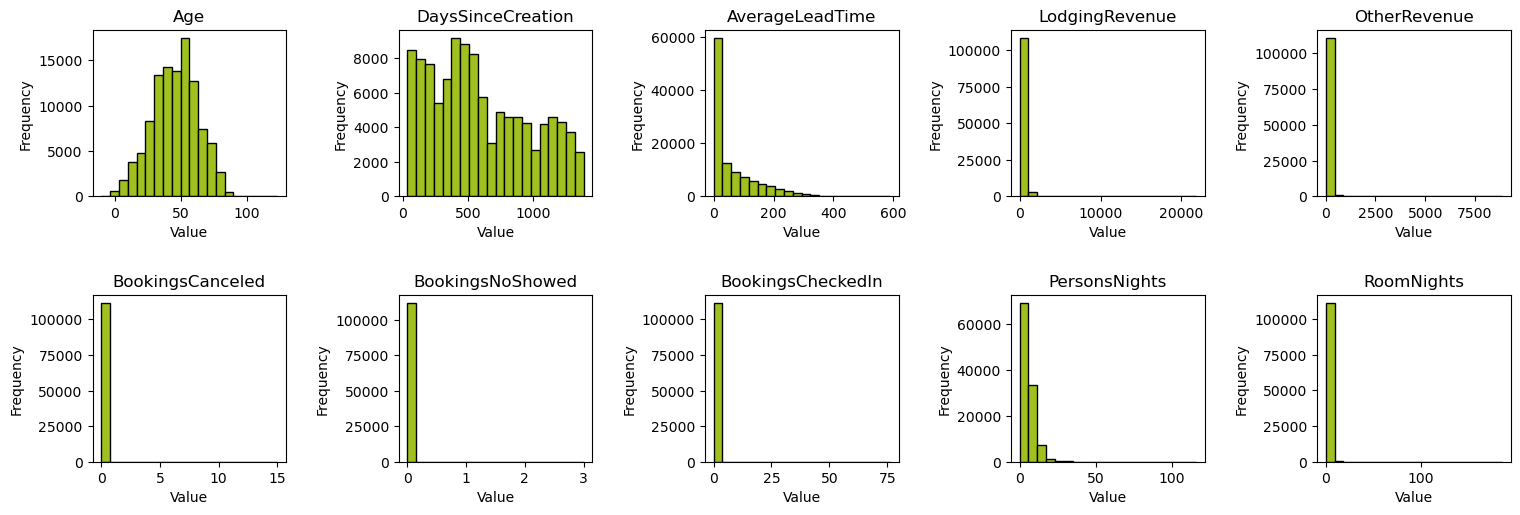

In [29]:
fig, axes = plt.subplots(2, 5, figsize=(16, 6))
fig.tight_layout(pad=5.0)

for i, var in enumerate(numeric_variables):
    row = i // 5
    col = i % 5
    axes[row, col].hist(df[var], bins=20, edgecolor='black', color='#A0C020')
    axes[row, col].set_title(var)
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')

plt.show()

#Adapted from previous notebook

- `Age`: The distribution appears to be approximately normal, with most values concentrated around the middle range (30-60 years old). There are few very young or very old customers. Middle-aged individuals may have greater financial stability and a stronger desire for comfort, making them willing to spend more and more frequently on accommodations.

- `DaysSinceCreation`: More frequency in lower values and a gradual decline as values increase. This suggests that most accounts were created recently.

- `AverageLeadTime`, `LodgingRevenue`, `OtherRevenue`,`BookingsCanceled`,`BookingsNoShowed`, `BookingsCheckedIn`, `PersonsNights`, `RoomNights` are highly right-skewed, with most values concentrated near zero and a few extreme cases. This suggests that the majority of bookings are short stays, generate low additional revenue, and have minimal cancellations or no-shows. However, there are occasional high-value outliers, indicating a small subset of customers who book well in advance, stay longer, or spend significantly more.

#### Numeric variables: Box Plots

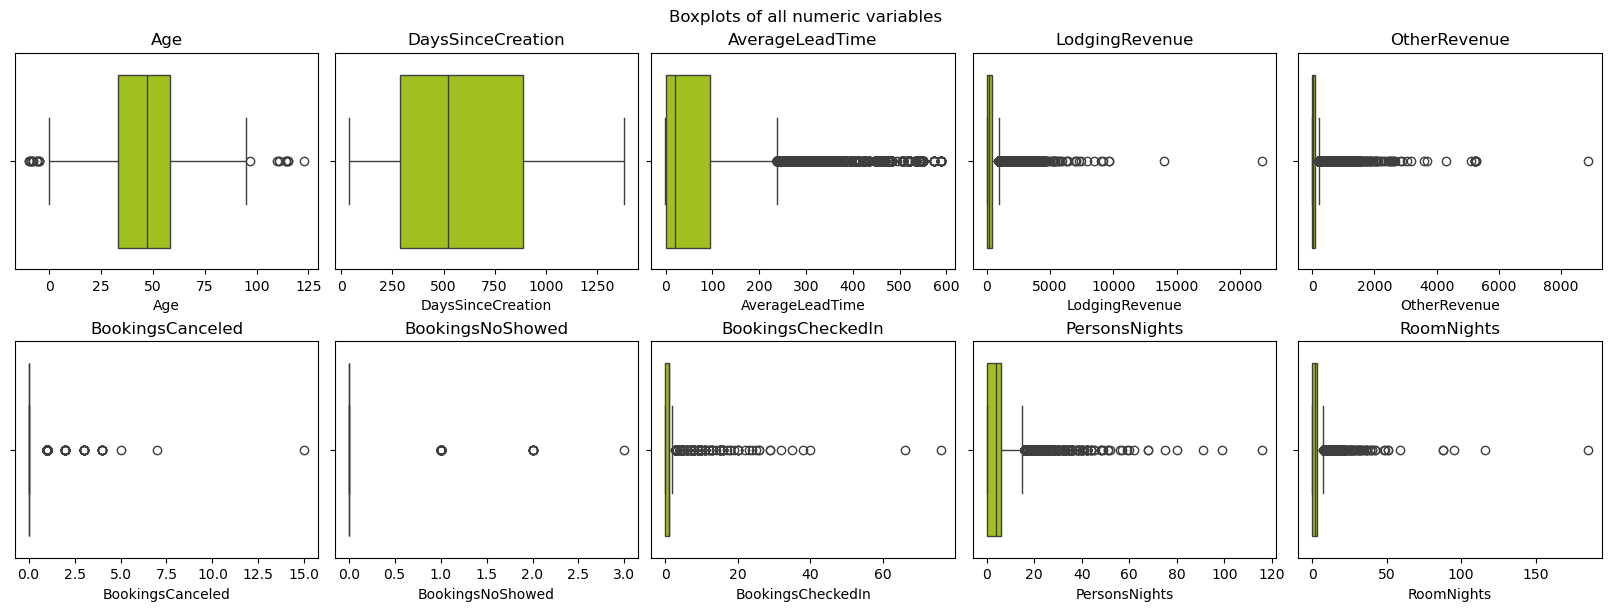

In [34]:
rows = 2
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(16, 6), constrained_layout=True)
for ax, var in zip(axes.flatten(), numeric_variables):
    sns.boxplot(x=df[var], ax=ax, orient='h', boxprops=dict(facecolor='#A0C020'))
    ax.set_title(var)
fig.suptitle('Boxplots of all numeric variables', fontsize=12)
plt.show()

#Adapted from previous notebook

The boxplots confirm the conclusion we took in the histograms.
Outliers will be adressed during the data preparation phase.

#### Categorical variables: BarPlots

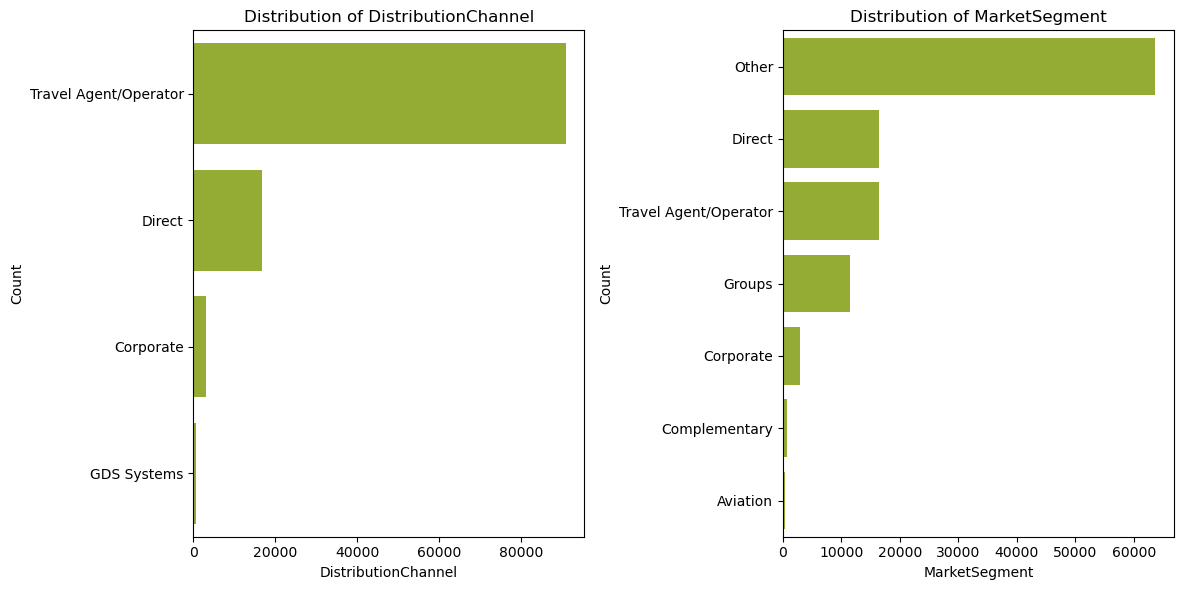

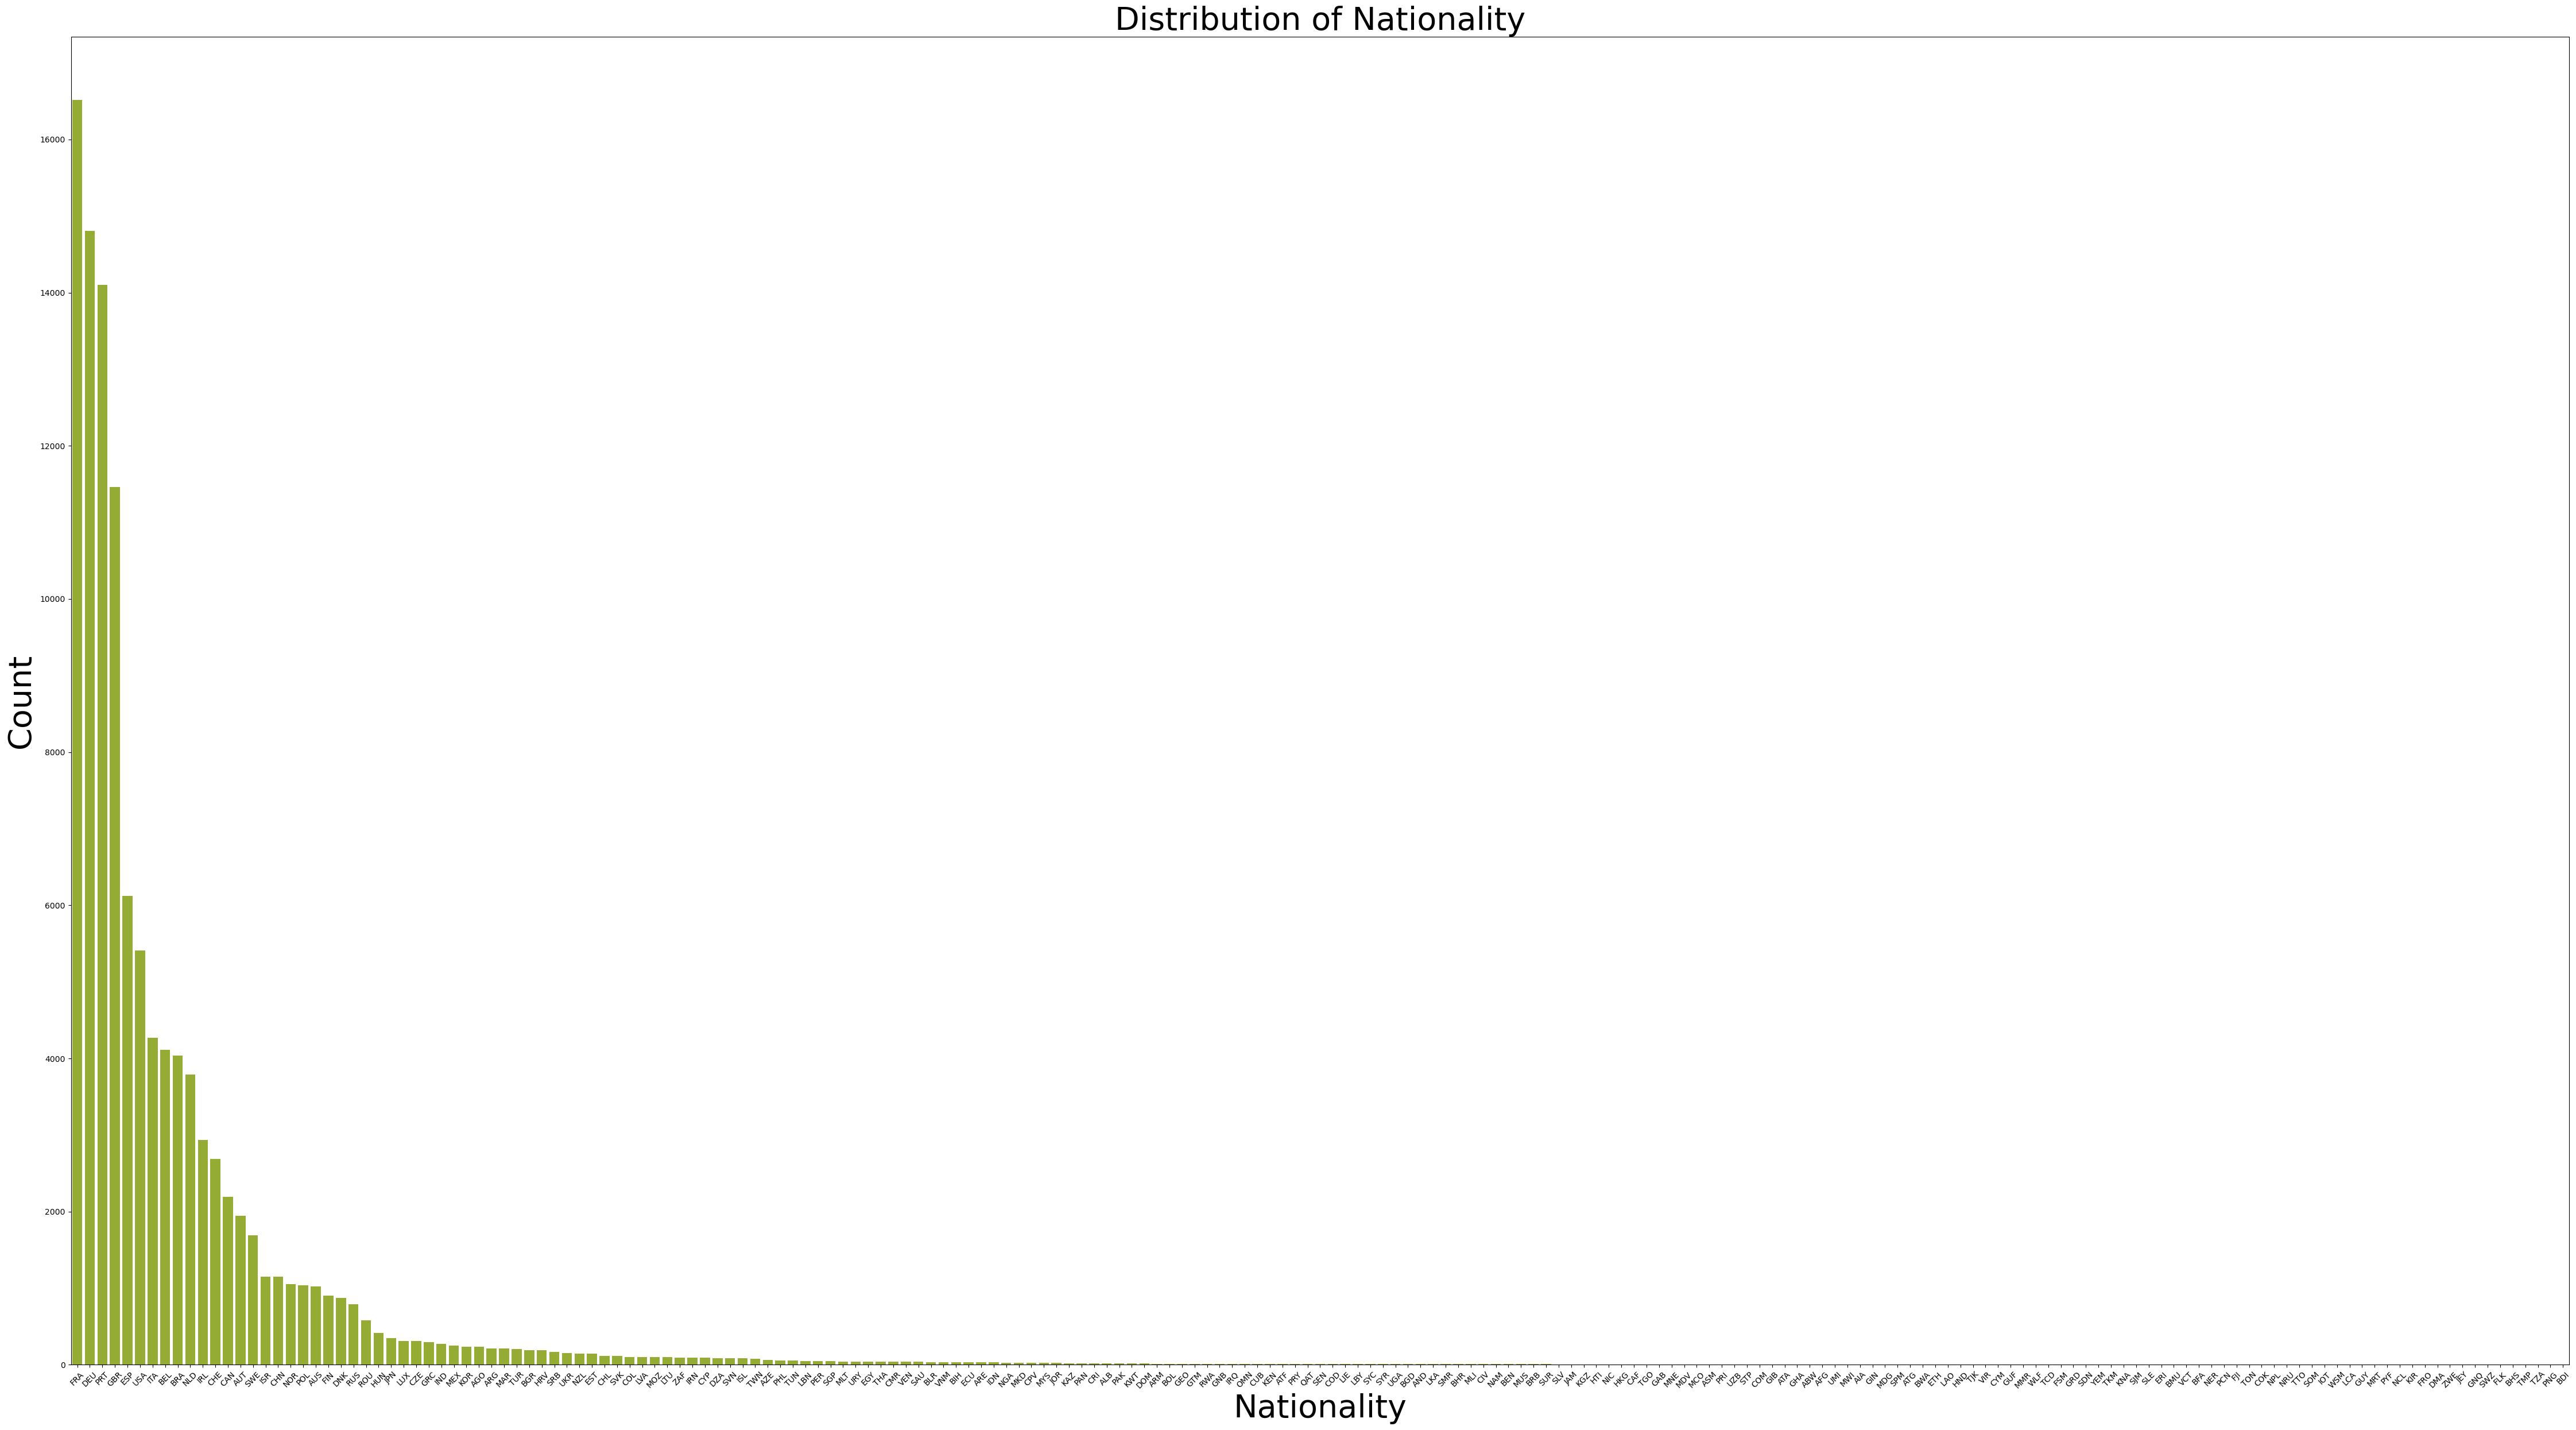

In [58]:
plt.figure(figsize=(16, 6))

# Plot bar charts for DistributionChannel and MarketSegmentat

for i, var in enumerate(categorical_variables, 1):
    if var != 'Nationality':
        plt.subplot(1, 3, i)
        sns.countplot(data=df, y=var, order=df[var].value_counts().index, color='#A0C020')
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.title(f'Distribution of {var}')
        plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


plt.figure(figsize=(45, 25))

# Plot bar chart for Nationality
sns.countplot(data=df, x='Nationality', order=df['Nationality'].value_counts().index, color='#A0C020')
plt.xlabel('Nationality', fontsize=40)
plt.ylabel('Count', fontsize=40)
plt.title('Distribution of Nationality', fontsize=40)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#Adapted from Chat GPT

The most dominant `DistributionChannel` is Travel/Operator. However, when examining the `MarketSegment`, this category does not stand out as prominently. Instead, the majority of customers fall under the 'Other' segment. Unfortunately, there is no detailed explanation regarding the business application or characteristics of this segment. Regarding `Nationality`, France is the country with the strongest concentration of customers.

#### Categorical variables: Geographic Map

The `Nationality` Bar Plot is difficult to visualize, so we are going to develop a Geographic Map to study this feature distribution.

In [83]:
# Agg the count of visitors by nationality
nationality_counts = df['Nationality'].value_counts().reset_index()
nationality_counts.columns = ['Country', 'VisitorCount']
nationality_counts['Percentage'] = (nationality_counts['VisitorCount'] / nationality_counts['VisitorCount'].sum()) * 100
nationality_counts['Percentage'] = nationality_counts['Percentage'].map('{:.0f}%'.format)
nationality_counts = nationality_counts.sort_values(by='VisitorCount', ascending=False)

nationality_counts.head(20)

,Country,VisitorCount,Percentage
0,FRA,16516,15%
1,DEU,14805,13%
2,PRT,14101,13%
3,GBR,11462,10%
4,ESP,6123,5%
5,USA,5409,5%
6,ITA,4268,4%
7,BEL,4111,4%
8,BRA,4037,4%
9,NLD,3794,3%


In [64]:
fig = go.Figure(data=go.Choropleth(
    locations=nationality_counts['Country'],
    z=nationality_counts['VisitorCount'],
    text=nationality_counts['Country'],
    colorscale='Greens',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='black',
    marker_line_width=0.5,
    colorbar_tickprefix='',
    colorbar_title='Count of Visitors'
))

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='natural earth'
    ),
    width=1000,  
    height=600,
    title='Visual Representation of Nationality of Customers',
    title_x=0.5,
)

fig.show()

#Adapted from a previous notebook and learned from https://www.youtube.com/watch?v=_FQMD-TpBpM

**France**, **Germany**, **Portugal** (National customers) and **Great Britain** are our top 4 customer nationality. We can have this biggest categories in mind when we reduce the cardinality of this variable.

#### Boolean variables: BarPlots

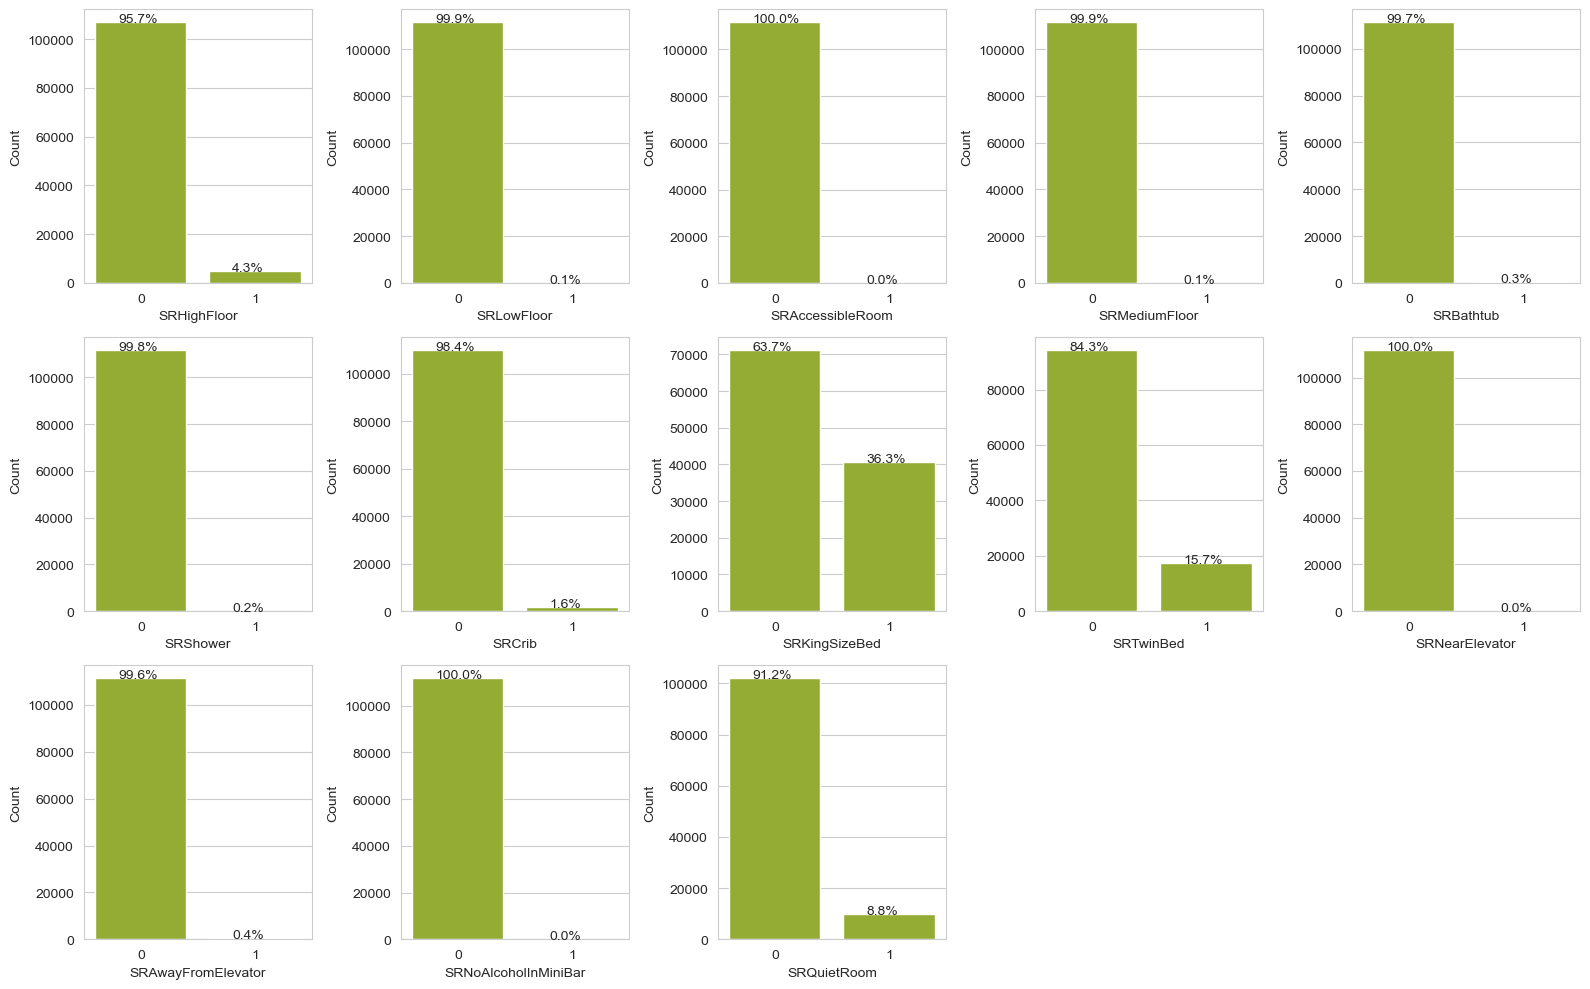

In [66]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))
for i, var in enumerate(boolean_variables, 1):
    plt.subplot(3, 5, i)
    sns.countplot(data=df, x=var, color='#A0C020') 
    plt.xlabel(var)
    plt.ylabel('Count')
    
    # Adding percentages to make it easier to read
    total = len(df[var])
    for p in plt.gca().patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.20
        y = p.get_y() + p.get_height()
        plt.gca().annotate(percentage, (x, y), size=10)

plt.tight_layout()
plt.show()

#Adapted from Chat GPT

- Clients typically specify a floor preference only when they request a top floor. More specifically, 4.3% of the customers asked for a higher floor.
- There is a nearly null percentage of customers asking for a Bathtub or a Shower. We can conclude these are not important caracteristics for clients when choosing a room.
- 1.6% have ask for a Crib indicating people are staying with babies. This can be an important information for marketing strategies.
- The difference of preferences start to show in the Bed choice, its normal since a lot of platforms ask for this information to assign the bedroom.
- We can also see that a QuietRoom is a important request for 8.8% of the customers. 

<a class="anchor" id="Bivariate-Vizualization">

### 1.2.5. Bivariate EDA: Data Visualization

</a>

#### Numeric-Numeric: Correlations

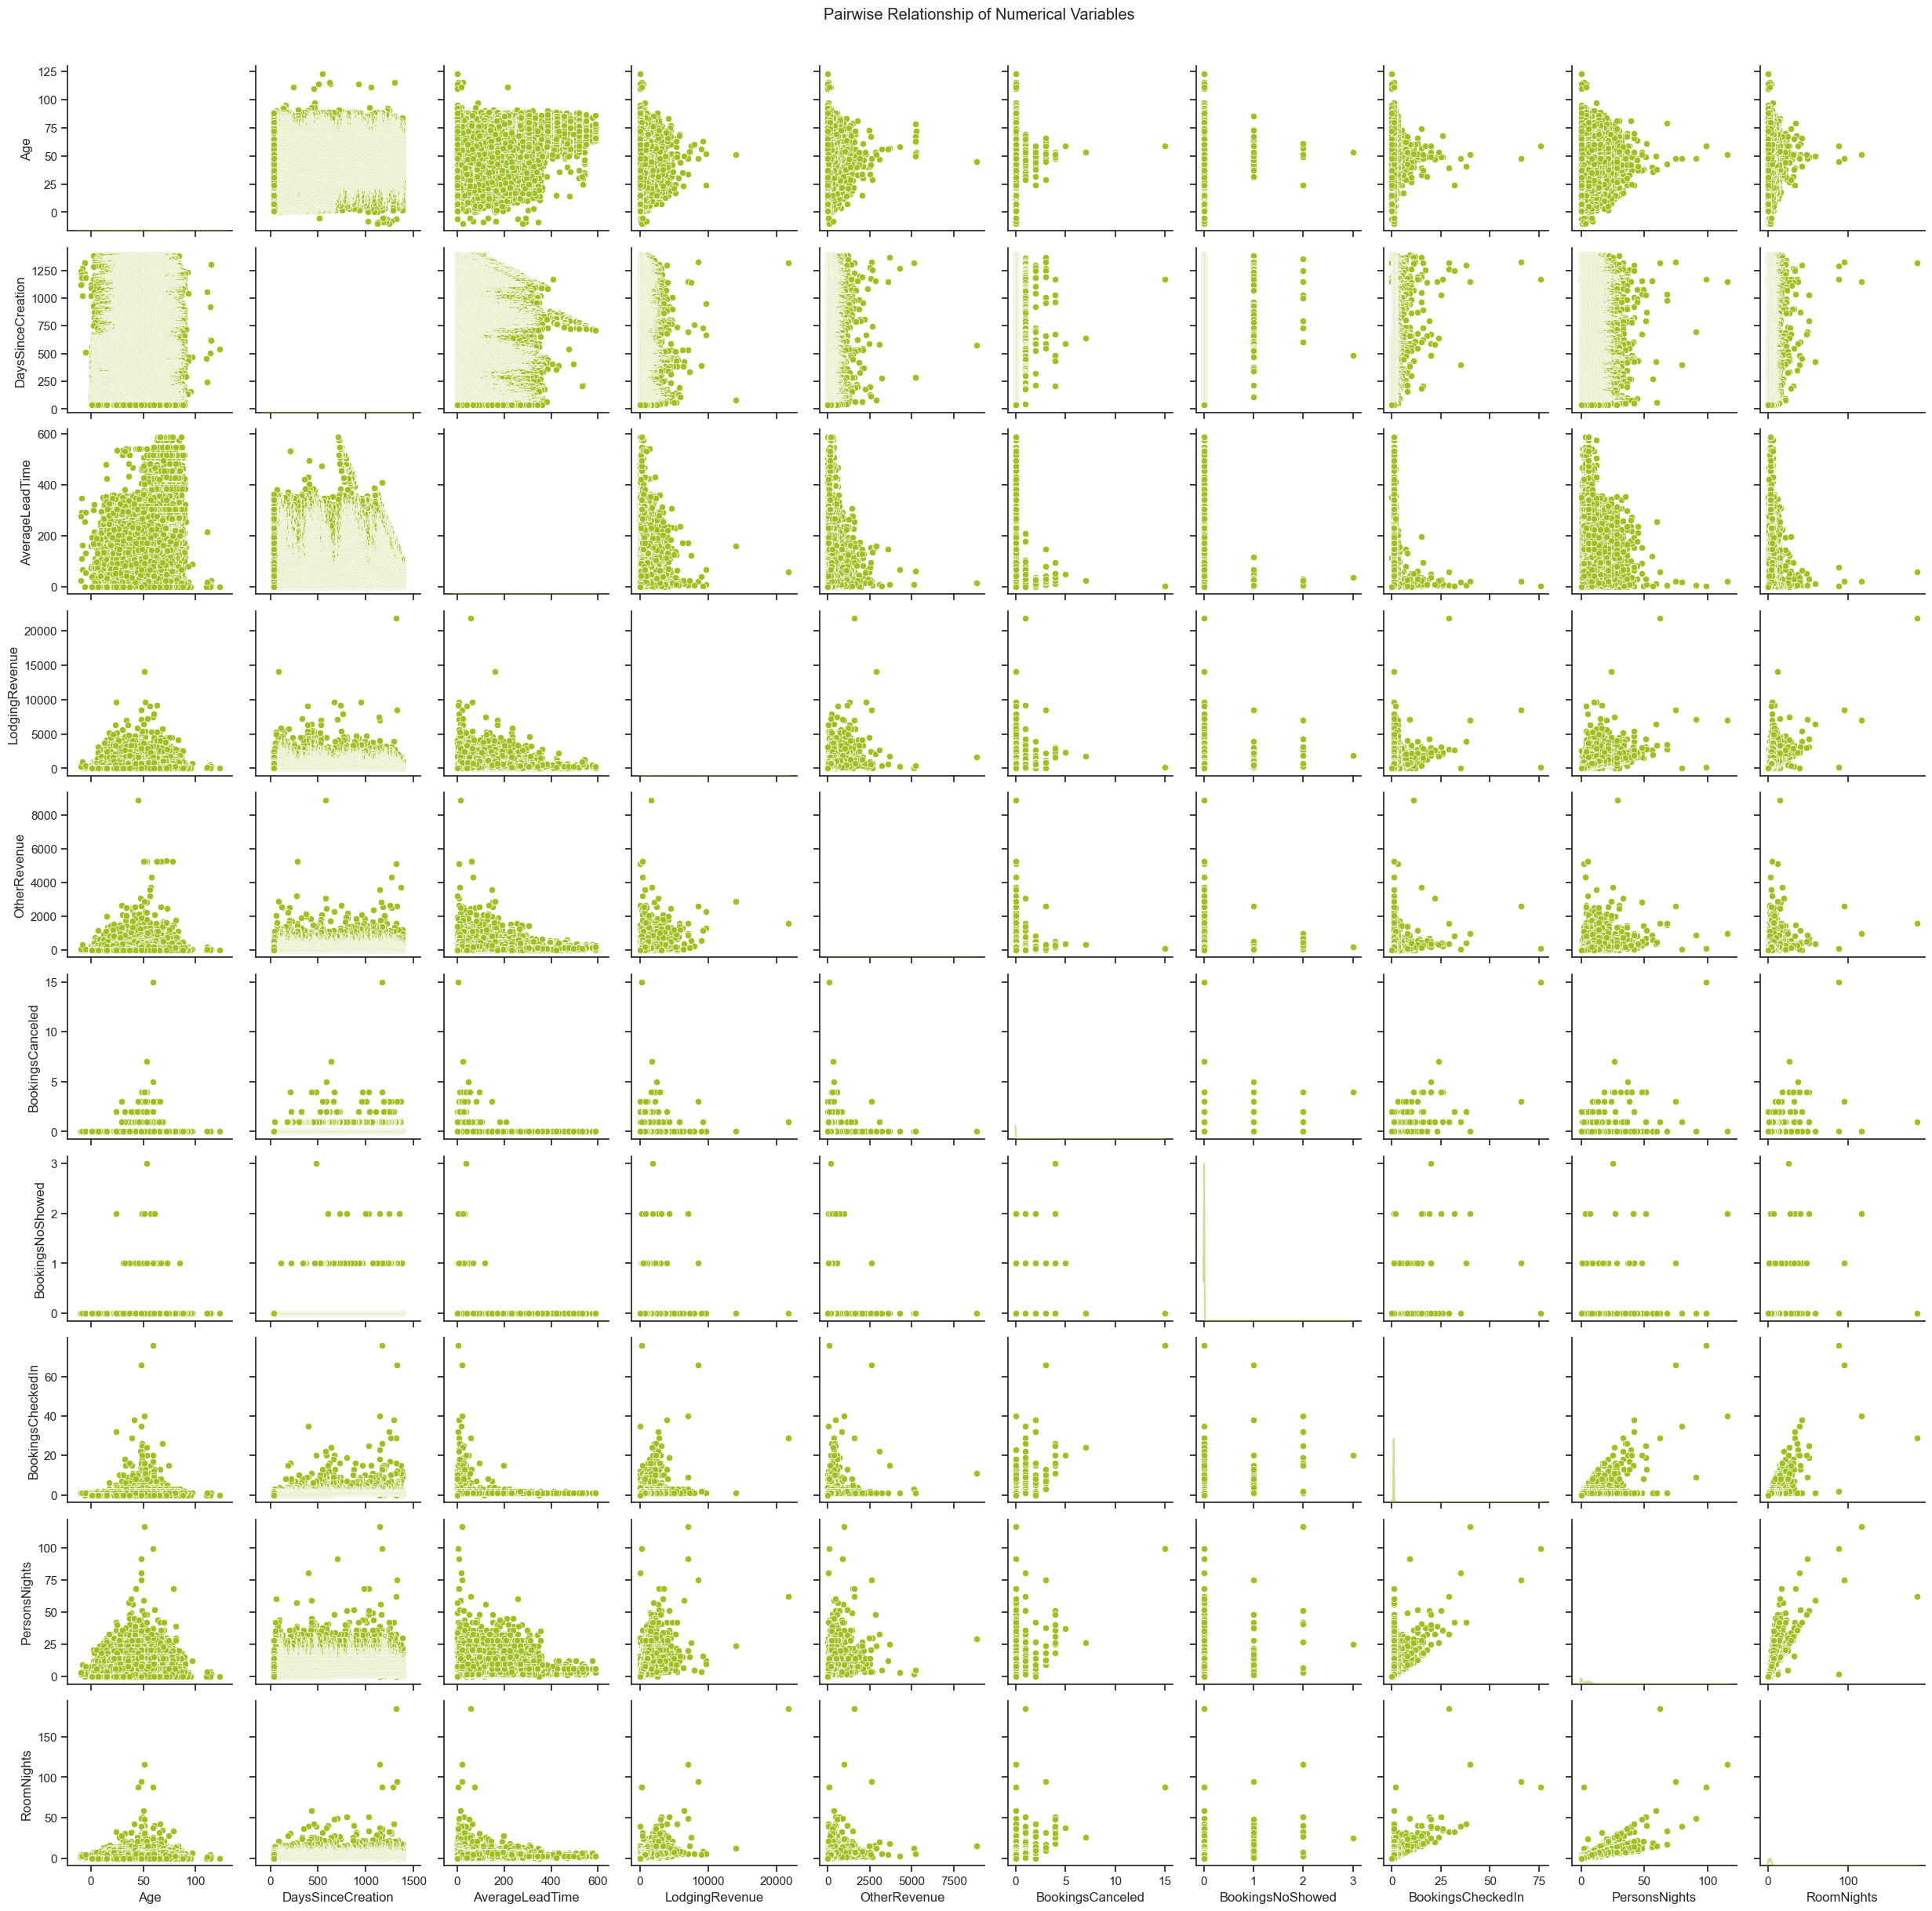

In [131]:
# Pairwise Scatter Plots
chart = sns.PairGrid(df[numeric_variables])
chart.map_upper(sns.scatterplot, color='#A0C020')  
chart.map_lower(sns.scatterplot, color='#A0C020')  
chart.map_diag(sns.kdeplot, color='#A0C020', alpha=0.5)  
plt.subplots_adjust(top=0.95)
plt.suptitle('Pairwise Relationship of Numerical Variables')
plt.show()

Since there aren’t many linear relationships in our data, we’ll use the **Spearman correlation** instead of Pearson. Spearman is better suited for capturing monotonic relationships (relationship between two variables where the direction (increasing or decreasing) is consistent but not necessarily at a constant rate) and is less affected by outliers, making it a more robust choice for our analysis.

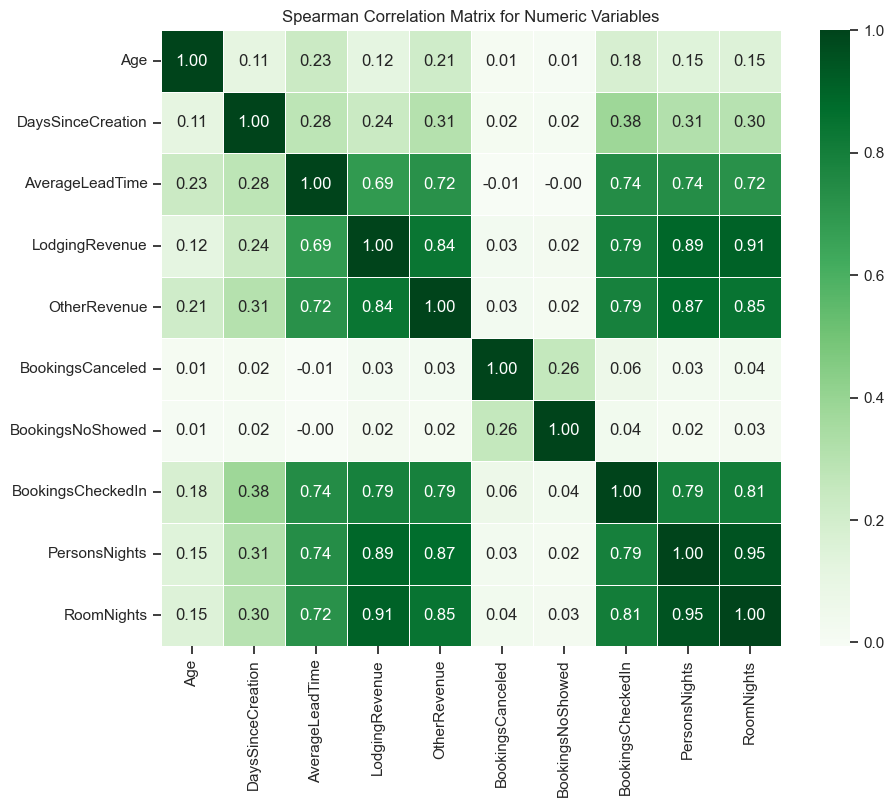

In [132]:
# correlation matrix using Spearman correlation
corr_matrix_spearman = df[numeric_variables].corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_spearman, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Matrix for Numeric Variables')
plt.show()

#Adapted from Previous Notebook

  **Strong Positive Correlations:**  
- `LodgingRevenue` and `RoomNights` (0.91)  
- `LodgingRevenue` and `PersonsNights` (0.89)  
- `RoomNights` and `PersonsNights` (0.95)  -> We should consider only keeping one
- `OtherRevenue` and `LodgingRevenue` (0.84)  -> It can be a good option to merge this two variables in a 'Total Revenue' variable
- `BookingsCheckedIn` and `RoomNights` (0.81)  

   These indicate that **more rooms/nights and person/nights directly lead to higher revenue**. This is expected, as longer stays generate more income. 


`AverageLeadTime` has a **moderate correlation** with `LodgingRevenue` (0.69), `OtherRevenue` (0.72), `BookingsCheckedIn` (0.74), and `RoomNights` (0.72). We can conclude that **longer booking lead times are associated with higher revenue and more nights stayed**. This information can be important for marketing strategies.

  
`BookingsCanceled` and `BookingsNoShowed` have very **low correlations** with the rest of the features, we should consider dropping this two variables in the data processing.

#### Numeric-Categorical: Correlations

In [133]:
# For visualization purposes, we will broadly reduce the categories of Nationality at this stage. 
# We will address this procedure more accurately during the data preparation phase.

top_countries = ['FRA', 'DEU', 'PRT', 'GBR', 'ESP', 'USA', 'ITA', 'BEL', 'BRA'] 
df['NationalityCategory'] = df['Nationality'].apply(lambda x: x if x in top_countries else 'Other')

In [134]:
# combinations for analysis
combinations = [
    {'numeric': 'Age', 'categorical': 'DistributionChannel'},
    {'numeric': 'DaysSinceCreation', 'categorical': 'DistributionChannel'},
    {'numeric': 'AverageLeadTime', 'categorical': 'DistributionChannel'},
    {'numeric': 'LodgingRevenue', 'categorical': 'DistributionChannel'},
    {'numeric': 'OtherRevenue', 'categorical': 'DistributionChannel'}, 
    {'numeric': 'BookingsCanceled', 'categorical': 'DistributionChannel'},
    {'numeric': 'BookingsNoShowed', 'categorical': 'DistributionChannel'}, 
    {'numeric': 'BookingsCheckedIn', 'categorical': 'DistributionChannel'}, 
    {'numeric': 'PersonsNights', 'categorical': 'DistributionChannel'},
    {'numeric': 'RoomNights', 'categorical': 'DistributionChannel'},

    {'numeric': 'Age', 'categorical': 'NationalityCategory'},
    {'numeric': 'DaysSinceCreation', 'categorical': 'NationalityCategory'},
    {'numeric': 'AverageLeadTime', 'categorical': 'NationalityCategory'},
    {'numeric': 'LodgingRevenue', 'categorical': 'NationalityCategory'},
    {'numeric': 'OtherRevenue', 'categorical': 'NationalityCategory'}, 
    {'numeric': 'BookingsCanceled', 'categorical': 'NationalityCategory'},
    {'numeric': 'BookingsNoShowed', 'categorical': 'NationalityCategory'}, 
    {'numeric': 'BookingsCheckedIn', 'categorical': 'NationalityCategory'}, 
    {'numeric': 'PersonsNights', 'categorical': 'NationalityCategory'},
    {'numeric': 'RoomNights', 'categorical': 'NationalityCategory'},

    {'numeric': 'Age', 'categorical': 'MarketSegment'},
    {'numeric': 'DaysSinceCreation', 'categorical': 'MarketSegment'},
    {'numeric': 'AverageLeadTime', 'categorical': 'MarketSegment'},
    {'numeric': 'LodgingRevenue', 'categorical': 'MarketSegment'},
    {'numeric': 'OtherRevenue', 'categorical': 'MarketSegment'}, 
    {'numeric': 'BookingsCanceled', 'categorical': 'MarketSegment'},
    {'numeric': 'BookingsNoShowed', 'categorical': 'MarketSegment'}, 
    {'numeric': 'BookingsCheckedIn', 'categorical': 'MarketSegment'}, 
    {'numeric': 'PersonsNights', 'categorical': 'MarketSegment'},
    {'numeric': 'RoomNights', 'categorical': 'MarketSegment'}
] 

In [135]:
# Function to generate a graph for each numeric-categorical combination
def generate_graph(data, numeric_col, categorical_col=None, ax=None):    
    if categorical_col:
        if data[categorical_col].dtype == 'object' or pd.api.types.is_categorical_dtype(data[categorical_col]):
            sns.barplot(x=categorical_col,y=numeric_col,data=data, ax=ax, color='#A0C020')
            ax.set_title(f"{numeric_col} by {categorical_col}")
            ax.set_xlabel(categorical_col)
            ax.set_ylabel(numeric_col)
            ax.tick_params(axis='x', rotation=45)
        else:
            ax.scatter(data[categorical_col], data[numeric_col], alpha=0.7, color='#A0C020')
            ax.set_title(f"{numeric_col} by {categorical_col}")
            ax.set_xlabel(categorical_col)
            ax.set_ylabel(numeric_col)

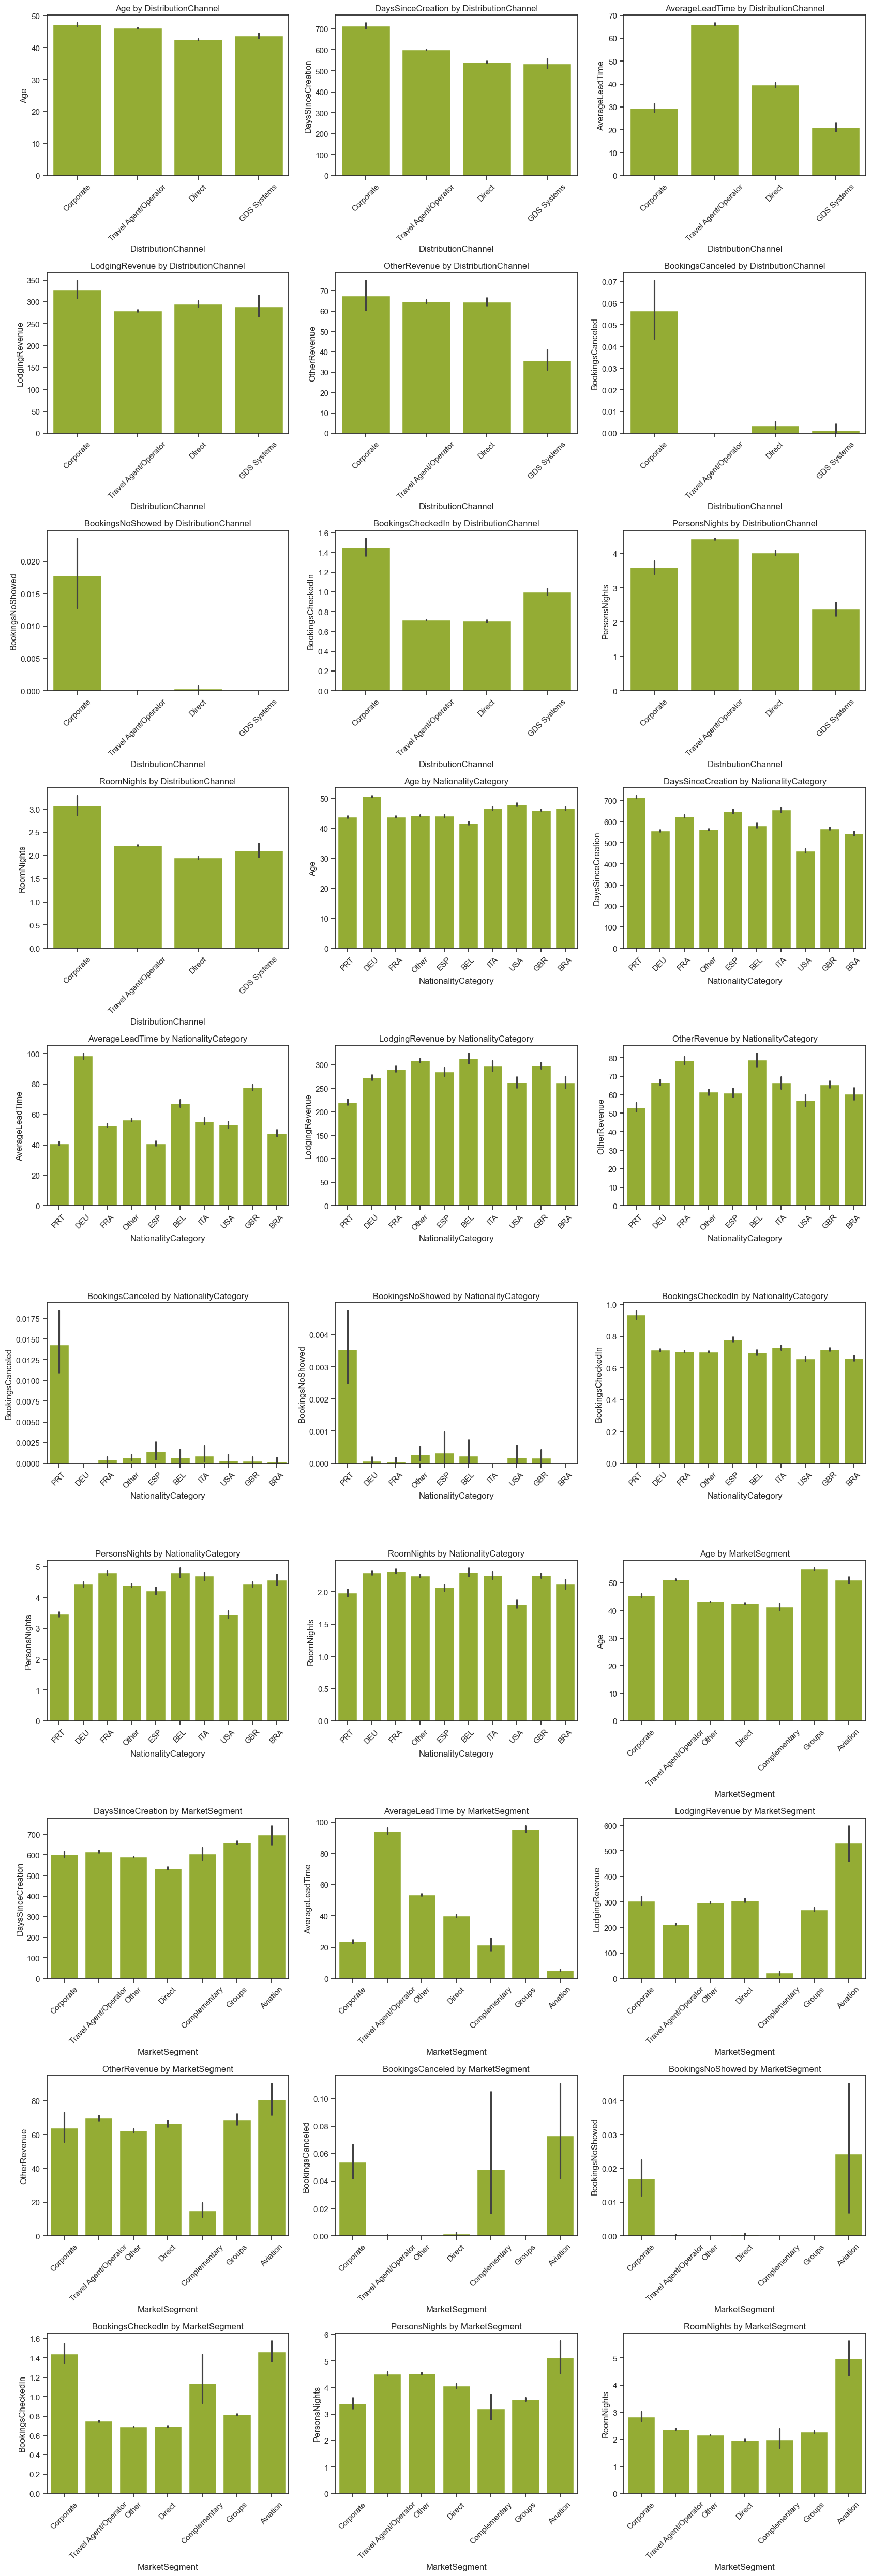

In [136]:
num_plots = len(combinations)
num_cols = 3
num_rows = math.ceil(num_plots / num_cols)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(17, 5 * num_rows))
for i, combo in enumerate(combinations):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col] if num_rows > 1 else axs[col]
    
    if 'categorical' in combo:
        generate_graph(df, combo['numeric'], categorical_col=combo['categorical'], ax=ax)

plt.tight_layout()
plt.show()

To complement the analysis, we will use cross-tabulations to compare the percentages. This will provide a clearer understanding of the relationships between the categorical and numeric variables. 

In [137]:
# Cross Tables
for combo in combinations:
    if 'categorical' in combo:
        categorical_col = combo['categorical']
        numeric_col = combo['numeric']
        cross_table = df.groupby(categorical_col, as_index=False)[numeric_col].mean()
        total = cross_table[numeric_col].sum()
        
        # Lidar com NaNs: preencher com 0 antes de converter para int
        cross_table['Percentage'] = ((cross_table[numeric_col] / total) * 100).fillna(0).round(0).astype(int).astype(str) + '%'
        cross_table = cross_table.sort_values(by=numeric_col, ascending=False)
        display(cross_table)

,DistributionChannel,Age,Percentage
0,Corporate,47.252743,26%
3,Travel Agent/Operator,46.168244,26%
2,GDS Systems,43.672566,24%
1,Direct,42.579531,24%


,DistributionChannel,DaysSinceCreation,Percentage
0,Corporate,715.551515,30%
3,Travel Agent/Operator,601.241334,25%
1,Direct,541.586507,23%
2,GDS Systems,535.722701,22%


,DistributionChannel,AverageLeadTime,Percentage
3,Travel Agent/Operator,66.156901,42%
1,Direct,39.581295,25%
0,Corporate,29.509729,19%
2,GDS Systems,21.222701,14%


,DistributionChannel,LodgingRevenue,Percentage
0,Corporate,327.794928,27%
1,Direct,295.040933,25%
2,GDS Systems,289.017342,24%
3,Travel Agent/Operator,280.222659,24%


,DistributionChannel,OtherRevenue,Percentage
0,Corporate,67.498804,29%
3,Travel Agent/Operator,64.834430,28%
1,Direct,64.529331,28%
2,GDS Systems,35.892399,15%


,DistributionChannel,BookingsCanceled,Percentage
0,Corporate,0.056459,92%
1,Direct,0.003376,5%
2,GDS Systems,0.001437,2%
3,Travel Agent/Operator,0.000220,0%


,DistributionChannel,BookingsNoShowed,Percentage
0,Corporate,0.017863,98%
1,Direct,0.000355,2%
3,Travel Agent/Operator,0.000055,0%
2,GDS Systems,0.000000,0%


,DistributionChannel,BookingsCheckedIn,Percentage
0,Corporate,1.450080,37%
2,GDS Systems,0.998563,26%
3,Travel Agent/Operator,0.717092,19%
1,Direct,0.705147,18%


,DistributionChannel,PersonsNights,Percentage
3,Travel Agent/Operator,4.425395,31%
1,Direct,4.020849,28%
0,Corporate,3.596172,25%
2,GDS Systems,2.389368,17%


,DistributionChannel,RoomNights,Percentage
0,Corporate,3.073046,33%
3,Travel Agent/Operator,2.220470,24%
2,GDS Systems,2.109195,23%
1,Direct,1.956584,21%


,NationalityCategory,Age,Percentage
2,DEU,50.760419,11%
9,USA,48.022000,11%
6,ITA,46.882849,10%
1,BRA,46.804558,10%
5,GBR,46.250829,10%
7,Other,44.398641,10%
3,ESP,44.351029,10%
4,FRA,44.006176,10%
8,PRT,43.920250,10%
0,BEL,41.875943,9%


,NationalityCategory,DaysSinceCreation,Percentage
8,PRT,717.286363,12%
6,ITA,656.144799,11%
3,ESP,649.364691,11%
4,FRA,626.145435,11%
0,BEL,581.732912,10%
5,GBR,567.424882,10%
7,Other,563.694314,10%
2,DEU,556.783722,9%
1,BRA,543.779787,9%
9,USA,462.059530,8%


,NationalityCategory,AverageLeadTime,Percentage
2,DEU,98.519284,17%
5,GBR,77.920433,13%
0,BEL,67.308198,11%
7,Other,56.513025,10%
6,ITA,55.592315,9%
9,USA,53.479756,9%
4,FRA,52.918685,9%
1,BRA,47.711667,8%
3,ESP,41.035930,7%
8,PRT,40.985391,7%


,NationalityCategory,LodgingRevenue,Percentage
0,BEL,314.184082,11%
7,Other,309.106457,11%
5,GBR,298.063909,11%
6,ITA,297.802762,11%
4,FRA,291.245713,10%
3,ESP,285.074197,10%
2,DEU,272.810439,10%
9,USA,263.280211,9%
1,BRA,261.962911,9%
8,PRT,220.445806,8%


,NationalityCategory,OtherRevenue,Percentage
0,BEL,78.784347,12%
4,FRA,78.668122,12%
2,DEU,66.865187,10%
6,ITA,66.495333,10%
5,GBR,65.610139,10%
7,Other,61.464883,9%
3,ESP,61.157738,9%
1,BRA,60.502432,9%
9,USA,57.181499,9%
8,PRT,53.254064,8%


,NationalityCategory,BookingsCanceled,Percentage
8,PRT,0.014325,73%
3,ESP,0.001470,8%
6,ITA,0.000937,5%
7,Other,0.000744,4%
0,BEL,0.000730,4%
4,FRA,0.000484,2%
9,USA,0.000370,2%
5,GBR,0.000262,1%
1,BRA,0.000248,1%
2,DEU,0.000000,0%


,NationalityCategory,BookingsNoShowed,Percentage
8,PRT,0.003546,72%
3,ESP,0.000327,7%
7,Other,0.000291,6%
0,BEL,0.000243,5%
9,USA,0.000185,4%
5,GBR,0.000174,4%
2,DEU,0.000068,1%
4,FRA,0.000061,1%
1,BRA,0.000000,0%
6,ITA,0.000000,0%


,NationalityCategory,BookingsCheckedIn,Percentage
8,PRT,0.935253,13%
3,ESP,0.781806,11%
6,ITA,0.730319,10%
5,GBR,0.719421,10%
2,DEU,0.714083,10%
4,FRA,0.705437,10%
7,Other,0.703472,10%
0,BEL,0.698127,10%
1,BRA,0.664355,9%
9,USA,0.658902,9%


,NationalityCategory,PersonsNights,Percentage
4,FRA,4.810608,11%
0,BEL,4.808806,11%
6,ITA,4.700094,11%
1,BRA,4.578400,11%
2,DEU,4.434380,10%
5,GBR,4.431775,10%
7,Other,4.404582,10%
3,ESP,4.219500,10%
8,PRT,3.460889,8%
9,USA,3.449806,8%


,NationalityCategory,RoomNights,Percentage
4,FRA,2.323202,11%
0,BEL,2.308441,11%
2,DEU,2.299358,11%
6,ITA,2.263590,10%
5,GBR,2.259030,10%
7,Other,2.255849,10%
1,BRA,2.124102,10%
3,ESP,2.072187,10%
8,PRT,1.985675,9%
9,USA,1.814199,8%


,MarketSegment,Age,Percentage
4,Groups,54.987702,17%
6,Travel Agent/Operator,51.217725,16%
0,Aviation,50.984906,15%
2,Corporate,45.476946,14%
5,Other,43.348875,13%
3,Direct,42.633978,13%
1,Complementary,41.424188,13%


,MarketSegment,DaysSinceCreation,Percentage
0,Aviation,698.013889,16%
4,Groups,661.408254,15%
6,Travel Agent/Operator,616.172935,14%
1,Complementary,607.106545,14%
2,Corporate,604.455817,14%
5,Other,591.624309,14%
3,Direct,536.652081,12%


,MarketSegment,AverageLeadTime,Percentage
4,Groups,95.776896,29%
6,Travel Agent/Operator,94.408304,28%
5,Other,53.608810,16%
3,Direct,40.111104,12%
2,Corporate,23.738997,7%
1,Complementary,21.687976,6%
0,Aviation,5.336806,2%


,MarketSegment,LodgingRevenue,Percentage
0,Aviation,530.432465,27%
3,Direct,306.455248,16%
2,Corporate,305.144661,16%
5,Other,299.012173,15%
4,Groups,270.408032,14%
6,Travel Agent/Operator,213.977329,11%
1,Complementary,22.027032,1%


,MarketSegment,OtherRevenue,Percentage
0,Aviation,80.760590,19%
6,Travel Agent/Operator,70.016510,16%
4,Groups,68.812907,16%
3,Direct,66.661558,16%
2,Corporate,64.018570,15%
5,Other,62.530171,15%
1,Complementary,15.155236,4%


,MarketSegment,BookingsCanceled,Percentage
0,Aviation,0.072917,41%
2,Corporate,0.053907,30%
1,Complementary,0.048706,27%
3,Direct,0.001772,1%
6,Travel Agent/Operator,0.000306,0%
4,Groups,0.000262,0%
5,Other,0.000110,0%


,MarketSegment,BookingsNoShowed,Percentage
0,Aviation,0.024306,58%
2,Corporate,0.017059,41%
3,Direct,0.000367,1%
6,Travel Agent/Operator,0.000245,1%
1,Complementary,0.000000,0%
4,Groups,0.000000,0%
5,Other,0.000000,0%


,MarketSegment,BookingsCheckedIn,Percentage
0,Aviation,1.461806,21%
2,Corporate,1.442511,21%
1,Complementary,1.141553,16%
4,Groups,0.817032,12%
6,Travel Agent/Operator,0.748120,11%
3,Direct,0.693699,10%
5,Other,0.692007,10%


,MarketSegment,PersonsNights,Percentage
0,Aviation,5.145833,18%
5,Other,4.537374,16%
6,Travel Agent/Operator,4.517459,16%
3,Direct,4.065453,14%
4,Groups,3.554227,13%
2,Corporate,3.394405,12%
1,Complementary,3.216134,11%


,MarketSegment,RoomNights,Percentage
0,Aviation,4.989583,27%
2,Corporate,2.835892,15%
6,Travel Agent/Operator,2.377668,13%
4,Groups,2.282436,12%
5,Other,2.163945,12%
1,Complementary,1.990868,11%
3,Direct,1.976532,11%


#### Categorical-Categorical: Cross-tabulations

In [138]:
# We will also use NationalityCategory instead of Nationality in this analysis
categorical_variables2 = ['NationalityCategory', 'DistributionChannel', 'MarketSegment'] 

In [139]:
# Categorical-Categorical Analysis with Chi-square
for i in range(len(categorical_variables2)):
    for j in range(i+1, len(categorical_variables2)):
        cat_var = categorical_variables2[i]
        cat_var2 = categorical_variables2[j]
        contingency_table = pd.crosstab(df[cat_var], df[cat_var2])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        display(contingency_table)
        print(f"Chi-square Test of Independence for {cat_var} and {cat_var2}: p-value = {p}")
        
#Adapted from previous notebook

DistributionChannel,Corporate,Direct,GDS Systems,Travel Agent/Operator
NationalityCategory,,,,
BEL,86,732,5,3288
BRA,67,466,7,3497
DEU,113,1319,77,13296
ESP,236,1135,125,4627
FRA,151,2329,41,13995
GBR,108,1470,142,9742
ITA,99,598,34,3537
Other,703,4329,148,25721
PRT,1422,3402,53,9224


Chi-square Test of Independence for NationalityCategory and DistributionChannel: p-value = 0.0


MarketSegment,Aviation,Complementary,Corporate,Direct,Groups,Other,Travel Agent/Operator
NationalityCategory,,,,,,,
BEL,33,0,69,731,143,2475,660
BRA,0,7,44,461,264,2748,513
DEU,11,9,159,1298,1521,7376,4431
ESP,19,6,216,1135,677,3446,624
FRA,20,20,160,2331,1341,9128,3516
GBR,10,6,122,1444,1005,7595,1280
ITA,26,3,106,600,390,2750,393
Other,115,44,533,4332,3362,19305,3210
PRT,53,557,1402,2932,1923,5735,1499


Chi-square Test of Independence for NationalityCategory and MarketSegment: p-value = 0.0


MarketSegment,Aviation,Complementary,Corporate,Direct,Groups,Other,Travel Agent/Operator
DistributionChannel,,,,,,,
Corporate,281,19,2204,13,482,37,99
Direct,0,510,51,15970,171,151,30
GDS Systems,0,0,2,7,5,677,5
Travel Agent/Operator,7,128,674,373,10803,62815,16219


Chi-square Test of Independence for DistributionChannel and MarketSegment: p-value = 0.0


#### Boolean-Boolean: Cross-tabulations

In [141]:
boolean_variables = ['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 
                'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 
                'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 
                'SRQuietRoom']

threshold = 0.05
for i in range(len(boolean_variables)):
    for j in range(i+1, len(boolean_variables)):
        bool_var = boolean_variables[i]
        bool_var2 = boolean_variables[j]
        contingency_table = pd.crosstab(df[bool_var], df[bool_var2])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        if p < threshold:
            display(contingency_table)
            print(f"Chi-square Test of Independence for {bool_var} and {bool_var2}: p-value = {p}")



SRBathtub,0,1
SRHighFloor,,
0,106684,299
1,4699,51


Chi-square Test of Independence for SRHighFloor and SRBathtub: p-value = 3.321257465607039e-21


SRShower,0,1
SRHighFloor,,
0,106826,157
1,4725,25


Chi-square Test of Independence for SRHighFloor and SRShower: p-value = 7.10595950428234e-10


SRKingSizeBed,0,1
SRHighFloor,,
0,69056,37927
1,2088,2662


Chi-square Test of Independence for SRHighFloor and SRKingSizeBed: p-value = 4.067197218839975e-183


SRTwinBed,0,1
SRHighFloor,,
0,90263,16720
1,3949,801


Chi-square Test of Independence for SRHighFloor and SRTwinBed: p-value = 0.023256752571913033


SRNearElevator,0,1
SRHighFloor,,
0,106954,29
1,4742,8


Chi-square Test of Independence for SRHighFloor and SRNearElevator: p-value = 1.3622784235898043e-06


SRAwayFromElevator,0,1
SRHighFloor,,
0,106776,207
1,4555,195


Chi-square Test of Independence for SRHighFloor and SRAwayFromElevator: p-value = 0.0


SRQuietRoom,0,1
SRHighFloor,,
0,98063,8920
1,3869,881


Chi-square Test of Independence for SRHighFloor and SRQuietRoom: p-value = 1.4158017820950864e-130


SRAccessibleRoom,0,1
SRLowFloor,,
0,111563,24
1,145,1


Chi-square Test of Independence for SRLowFloor and SRAccessibleRoom: p-value = 0.00966371524525142


SRBathtub,0,1
SRLowFloor,,
0,111240,347
1,143,3


Chi-square Test of Independence for SRLowFloor and SRBathtub: p-value = 0.002468283322679939


SRKingSizeBed,0,1
SRLowFloor,,
0,71068,40519
1,76,70


Chi-square Test of Independence for SRLowFloor and SRKingSizeBed: p-value = 0.004585472833072309


SRQuietRoom,0,1
SRLowFloor,,
0,101813,9774
1,119,27


Chi-square Test of Independence for SRLowFloor and SRQuietRoom: p-value = 6.105676897092218e-05


SRShower,0,1
SRAccessibleRoom,,
0,111528,180
1,23,2


Chi-square Test of Independence for SRAccessibleRoom and SRShower: p-value = 4.549551183489832e-13


SRNearElevator,0,1
SRAccessibleRoom,,
0,111674,34
1,22,3


Chi-square Test of Independence for SRAccessibleRoom and SRNearElevator: p-value = 3.3217101276785456e-165


SRShower,0,1
SRMediumFloor,,
0,111467,180
1,84,2


Chi-square Test of Independence for SRMediumFloor and SRShower: p-value = 0.00027497424350004


SRTwinBed,0,1
SRMediumFloor,,
0,94147,17500
1,65,21


Chi-square Test of Independence for SRMediumFloor and SRTwinBed: p-value = 0.03744507127822283


SRNearElevator,0,1
SRMediumFloor,,
0,111611,36
1,85,1


Chi-square Test of Independence for SRMediumFloor and SRNearElevator: p-value = 0.00517971447598147


SRAwayFromElevator,0,1
SRMediumFloor,,
0,111253,394
1,78,8


Chi-square Test of Independence for SRMediumFloor and SRAwayFromElevator: p-value = 2.1970112110911806e-38


SRQuietRoom,0,1
SRMediumFloor,,
0,101869,9778
1,63,23


Chi-square Test of Independence for SRMediumFloor and SRQuietRoom: p-value = 1.1746081938423862e-08


SRCrib,0,1
SRBathtub,,
0,109603,1780
1,322,28


Chi-square Test of Independence for SRBathtub and SRCrib: p-value = 1.9434395909054978e-20


SRKingSizeBed,0,1
SRBathtub,,
0,71006,40377
1,138,212


Chi-square Test of Independence for SRBathtub and SRKingSizeBed: p-value = 5.991176573649041e-21


SRTwinBed,0,1
SRBathtub,,
0,93902,17481
1,310,40


Chi-square Test of Independence for SRBathtub and SRTwinBed: p-value = 0.03419621867508318


SRAwayFromElevator,0,1
SRBathtub,,
0,110985,398
1,346,4


Chi-square Test of Independence for SRBathtub and SRAwayFromElevator: p-value = 0.045118054457665355


SRQuietRoom,0,1
SRBathtub,,
0,101631,9752
1,301,49


Chi-square Test of Independence for SRBathtub and SRQuietRoom: p-value = 0.0007560048151707746


SRKingSizeBed,0,1
SRShower,,
0,71067,40484
1,77,105


Chi-square Test of Independence for SRShower and SRKingSizeBed: p-value = 3.200987524920014e-09


SRNearElevator,0,1
SRShower,,
0,111516,35
1,180,2


Chi-square Test of Independence for SRShower and SRNearElevator: p-value = 4.349630590673492e-09


SRQuietRoom,0,1
SRShower,,
0,101785,9766
1,147,35


Chi-square Test of Independence for SRShower and SRQuietRoom: p-value = 1.1690211544537033e-06


SRKingSizeBed,0,1
SRCrib,,
0,70273,39652
1,871,937


Chi-square Test of Independence for SRCrib and SRKingSizeBed: p-value = 2.930176987179501e-43


SRTwinBed,0,1
SRCrib,,
0,92466,17459
1,1746,62


Chi-square Test of Independence for SRCrib and SRTwinBed: p-value = 4.3714316659293176e-47


SRAwayFromElevator,0,1
SRCrib,,
0,109536,389
1,1795,13


Chi-square Test of Independence for SRCrib and SRAwayFromElevator: p-value = 0.017592180615739368


SRNoAlcoholInMiniBar,0,1
SRCrib,,
0,109906,19
1,1805,3


Chi-square Test of Independence for SRCrib and SRNoAlcoholInMiniBar: p-value = 0.00029098421089882124


SRQuietRoom,0,1
SRCrib,,
0,100257,9668
1,1675,133


Chi-square Test of Independence for SRCrib and SRQuietRoom: p-value = 0.03543669615799684


SRTwinBed,0,1
SRKingSizeBed,,
0,53896,17248
1,40316,273


Chi-square Test of Independence for SRKingSizeBed and SRTwinBed: p-value = 0.0


SRAwayFromElevator,0,1
SRKingSizeBed,,
0,70936,208
1,40395,194


Chi-square Test of Independence for SRKingSizeBed and SRAwayFromElevator: p-value = 8.167377074206044e-07


SRQuietRoom,0,1
SRKingSizeBed,,
0,66521,4623
1,35411,5178


Chi-square Test of Independence for SRKingSizeBed and SRQuietRoom: p-value = 6.048203943600293e-277


SRNoAlcoholInMiniBar,0,1
SRTwinBed,,
0,94198,14
1,17513,8


Chi-square Test of Independence for SRTwinBed and SRNoAlcoholInMiniBar: p-value = 0.017552095588057343


SRQuietRoom,0,1
SRAwayFromElevator,,
0,101690,9641
1,242,160


Chi-square Test of Independence for SRAwayFromElevator and SRQuietRoom: p-value = 9.914541294810432e-107


SRQuietRoom,0,1
SRNoAlcoholInMiniBar,,
0,101918,9793
1,14,8


Chi-square Test of Independence for SRNoAlcoholInMiniBar and SRQuietRoom: p-value = 2.686970773146233e-05


`Boolean-Boolean Analysis`: Imbalanced data is common in boolean variables, where one value (e.g., 0) is much more frequent than the other (e.g., 1). This imbalance can skew statistical results and make it harder to detect meaningful relationships, as the analysis may be dominated by the more frequent category.
Also, the chi-square test of independence assumes that the data is randomly sampled and the expected frequencies in each cell of the contingency table are sufficiently large (usually > 5). Therefore, in these cases, the p-values may not be reliable, leading to incorrect conclusions about the relationships between variables.